# Laboratorium 3

### Konfiguracja

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
from matplotlib.widgets import Button

class _Button_callback(object):
    def __init__(self, scenes):
        self.i = 0
        self.scenes = scenes
        self.adding_points = False
        self.added_points = []

    def set_axes(self, ax):
        self.ax = ax
        
    def next(self, event):
        self.i = (self.i + 1) % len(scenes)
        self.draw()

    def prev(self, event):
        self.i = (self.i - 1) % len(scenes)
        self.draw()
        
    def draw(self):
        self.ax.clear()
        for collection in (scenes[self.i].points + self.added_points):
            self.ax.scatter(*zip(*(np.array(collection.points))), c=collection.color)
        for collection in scenes[self.i].lines:
            self.ax.add_collection(collection.collection)
        self.ax.autoscale()
        plt.draw()
        
    def add_point(self, event):
        self.adding_points = not self.adding_points
        if self.adding_points:
            self.added_points.append(PointsCollection())
            
    def on_click(self, event):
        if self.adding_points:
            self.added_points[-1].add_points([(event.xdata, event.ydata)])
            self.draw()


### Interfejsy

In [43]:
class Scene:
    def __init__(self, points=[], lines=[]):
        self.points=points
        self.lines=lines

class PointsCollection:
    def __init__(self, points = [], color = None):
        self.points = points
        self.color = color
    
    def add_points(self, points):
        self.points = self.points + points

class LinesCollection:
    def __init__(self, lines = [], color = None):
        if color:
            self.collection = mcoll.LineCollection(lines, [mcolors.to_rgba(color)] * len(lines))
        else:
            self.collection = mcoll.LineCollection(lines)
            
class Plot:
    def __init__(self, scenes = []):
        self.scenes = scenes
        self.added_point = []
        
    def add_scene(self, scene):
        self.scenes.append(scene)
    
    def add_scenes(self, scenes):
        self.scenes = self.scenes + scenes
        
    def get_added_points(self):
        return self.added_points

    def __configure_buttons(self, callback):
        plt.subplots_adjust(bottom=0.2)
        ax_prev = plt.axes([0.6, 0.05, 0.15, 0.075])
        ax_next = plt.axes([0.76, 0.05, 0.15, 0.075])
        ax_add_point = plt.axes([0.44, 0.05, 0.15, 0.075])
        b_next = Button(ax_next, 'Następny')
        b_next.on_clicked(callback.next)
        b_prev = Button(ax_prev, 'Poprzedni')
        b_prev.on_clicked(callback.prev)
        b_add_point = Button(ax_add_point, 'Rysowanie')
        b_add_point.on_clicked(callback.add_point)
        return [b_prev, b_next, b_add_point]
    
    def draw(self):
        fig = plt.figure()
        callback = _Button_callback(self.scenes)
        self.widgets = self.__configure_buttons(callback)
        ax = plt.axes()
        callback.set_axes(ax)
        fig.canvas.mpl_connect('button_press_event', callback.on_click)
        plt.show()
        callback.draw()
        


### Przykład użycia

<IPython.core.display.Javascript object>


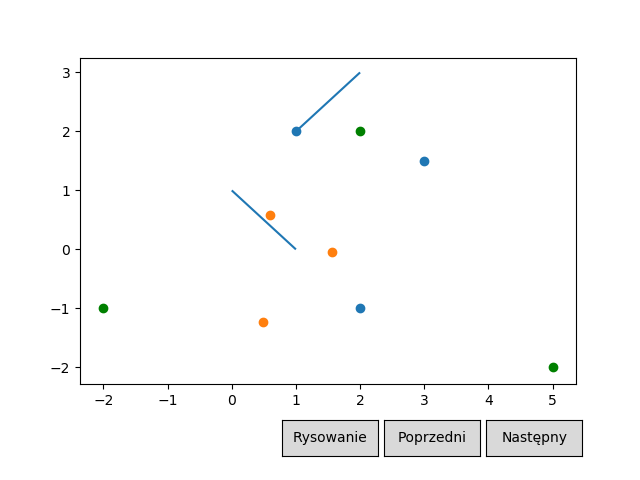

In [41]:
%matplotlib notebook

scenes=[Scene([PointsCollection([(1, 2), (3, 1.5), (2, -1)]), 
               PointsCollection([(5, -2), (2, 2), (-2, -1)], 'green')], 
              [LinesCollection([[(1,2),(2,3)], [(0,1),(1,0)]])]), 
        Scene([PointsCollection([(1, 2), (3, 1.5), (2, -1)], 'red'), 
               PointsCollection([(5, -2), (2, 2), (-2, 1)], 'black')], 
              [LinesCollection([[(-1,2),(-2,3)], [(0,-1),(-1,0)]])])]

plot = Plot(scenes)
plot.draw() 


### Rozwiązanie

In [42]:
%matplotlib notebook

